In [2]:
from google.colab import files
uploaded = files.upload()

Saving Judgment_Embeddings_InLegalBERT.xlsx to Judgment_Embeddings_InLegalBERT.xlsx


Mean of class 1:
 feature_0     -0.288665
feature_1     -0.042154
feature_2      0.260156
feature_3      0.019092
feature_4      0.304639
                 ...   
feature_763   -0.087901
feature_764   -0.108354
feature_765    0.063848
feature_766    0.107924
feature_767    0.168716
Length: 768, dtype: float64
Mean of class 2:
feature_0     -0.306845
feature_1     -0.029217
feature_2      0.237020
feature_3      0.038433
feature_4      0.280382
                 ...   
feature_763   -0.087592
feature_764   -0.148234
feature_765    0.057287
feature_766    0.095292
feature_767    0.115401
Length: 768, dtype: float64
Spread of class 1:
feature_0      0.073276
feature_1      0.057865
feature_2      0.056469
feature_3      0.052982
feature_4      0.068927
                 ...   
feature_763    0.071244
feature_764    0.057596
feature_765    0.048776
feature_766    0.060516
feature_767    0.066275
Length: 768, dtype: float64
Spread of class 2:
feature_0      0.067161
feature_1      0.058290
fea

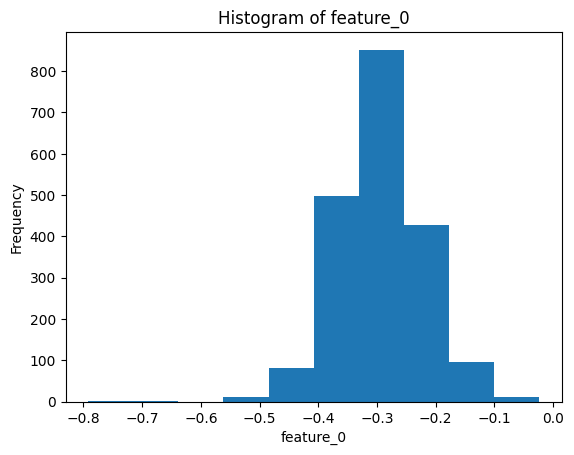

Mean of feature_0: -0.2942904140517733
Variance of feature_0: 0.005171865802813616
Minkowski distance for r=1 is 61.06253898923751
Minkowski distance for r=2 is 2.798647396708306
Minkowski distance for r=3 is 1.094893667946854
Minkowski distance for r=4 is 0.719283475711807
Minkowski distance for r=5 is 0.5775329275544238
Minkowski distance for r=6 is 0.5107765088675822
Minkowski distance for r=7 is 0.4759102933055662
Minkowski distance for r=8 is 0.4567373497118208
Minkowski distance for r=9 is 0.44588054063678007
Minkowski distance for r=10 is 0.4396018571614987


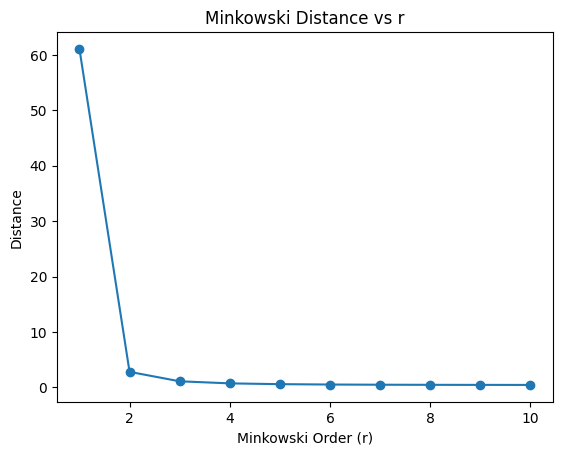

k-NN Accuracy:(k=3) 0.8585858585858586
Predictions: [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0

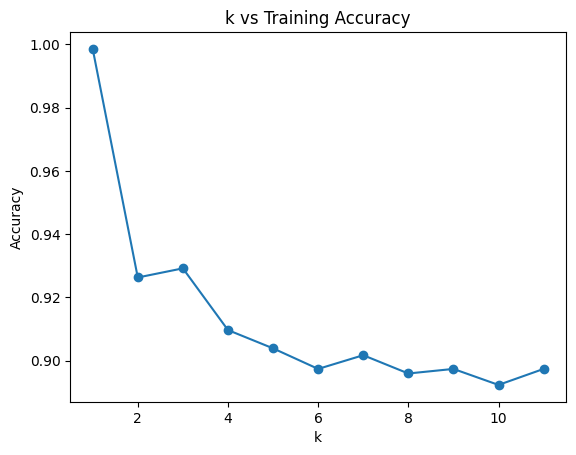

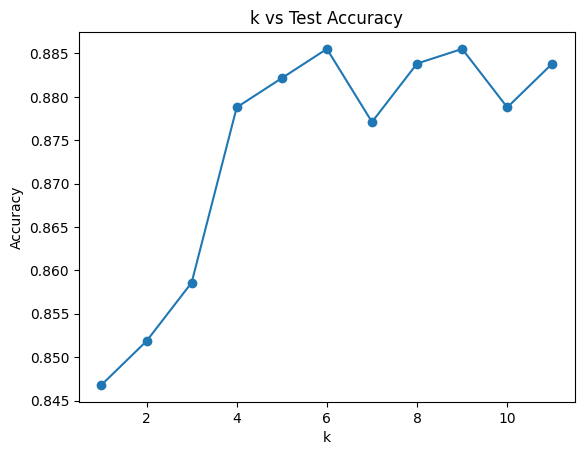

Confusion Matrix(training):
[[894  51]
 [ 47 392]]
Classification Report(training):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       945
           1       0.88      0.89      0.89       439

    accuracy                           0.93      1384
   macro avg       0.92      0.92      0.92      1384
weighted avg       0.93      0.93      0.93      1384

Confusion Matrix(test):
[[381  40]
 [ 44 129]]
Classification Report(test):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       421
           1       0.76      0.75      0.75       173

    accuracy                           0.86       594
   macro avg       0.83      0.83      0.83       594
weighted avg       0.86      0.86      0.86       594



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.spatial.distance import minkowski

df = pd.read_excel("Judgment_Embeddings_InLegalBERT.xlsx")
df = df[df["Label"].isin([0, 1])]
X = df.drop(columns=["Label"])
Y = df["Label"]

#A1
class1 = df[df["Label"] == 0].drop(columns=["Label"])
class2 = df[df["Label"] == 1].drop(columns=["Label"])
mean1 = class1.mean(axis=0)
print(f"Mean of class 1:\n {mean1}")
mean2 = class2.mean(axis=0)
print(f"Mean of class 2:\n{mean2}")
spread1 = class1.std(axis=0)
spread2 = class2.std(axis=0)
print(f"Spread of class 1:\n{spread1}")
print(f"Spread of class 2:\n{spread2}")
interclass_distance = np.linalg.norm(mean1 - mean2)
print(f"Interclass distance is {interclass_distance}")

#A2
feature = "feature_0"
plt.hist(df[feature])
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.title(f"Histogram of {feature}")
plt.show()
print(f"Mean of {feature}: {df[feature].mean()}")
print(f"Variance of {feature}: {df[feature].var()}")

# A3
vec1 = X.iloc[0].values
vec2 = X.iloc[1].values
minkowski_distances = []
for r in range(1, 11):
    dist = minkowski(vec1, vec2, r)
    minkowski_distances.append(dist)
    print(f"Minkowski distance for r={r} is {dist}")
plt.plot(range(1, 11), minkowski_distances, marker="o")
plt.xlabel("Minkowski Order (r)")
plt.ylabel("Distance")
plt.title("Minkowski Distance vs r")
plt.show()

# A4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# A5
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, Y_train)

# A6
accuracy = kNN.score(X_test, Y_test)
print("k-NN Accuracy:(k=3)", accuracy)

# A7:
predictions = kNN.predict(X_test)
print("Predictions:", predictions)

# A8:
k_values = range(1, 12)
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_acc = knn.score(X_train, Y_train)
    train_accuracies.append(train_acc)
    test_acc = knn.score(X_test, Y_test)
    test_accuracies.append(test_acc)
    print(f"k = {k}: Training Accuracy = {train_acc:.2f}, Testing Accuracy = {test_acc:.2f}")
plt.plot(k_values,train_accuracies, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Training Accuracy")
plt.show()
plt.plot(k_values,test_accuracies, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Test Accuracy")
plt.show()

#A9:
y_pred = kNN.predict(X_train)
conf_matrix = confusion_matrix(Y_train, y_pred)
print(f"Confusion Matrix(training):\n{conf_matrix}")
print(f"Classification Report(training):\n{classification_report(Y_train, y_pred)}")
Y_pred = kNN.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix(test):\n{conf_matrix}")
print(f"Classification Report(test):\n{classification_report(Y_test, Y_pred)}")